<a href="https://colab.research.google.com/github/PranavKhedekar16/GRIP-At-The-Sparks-Foundation-Tasks/blob/master/GRIP_TSF_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP At The Sparks Foundation**

**Task #4 - To Explore Decision Tree Algorithm**

1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Importing the Iris CSV File

In [2]:
pdata = pd.read_csv("Iris.csv")
pdata.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


3. Using describe function

In [3]:
pdata.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


4. Collecting information of the given data

In [4]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


5. Creating the dataframe

In [7]:
import sklearn.datasets as datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [16]:
x = pdata.iloc[:, [0, 1, 2, 3]].values
y = pdata["Species"]
dataset_x = pd.DataFrame({'SepalLengthCm': x[:, 0], 'SepalWidthCm': x[:, 1], 'PetalLengthCm': x[:, 2], 'PetalWidthCm': x[:, 3]})
dataset_x.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


6. Creating a target variable 

In [18]:
y= iris.target
dataset_x['target']=y
dataset_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


7. Checking the missing values

In [19]:
dataset_x.apply(lambda i:sum(i.isnull()))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
target           0
dtype: int64

8. Importing the libraries

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split

9. Splitting the data

In [22]:
X = dataset_x.drop('target', axis=1)
y = dataset_x['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

10. Applying Decision Tree Algorithm

In [23]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

11. Setting the prediction

In [24]:
pred = dtree.predict(X_test)

12. Visualising the Decision Tree

[Text(372.0, 815.4, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolour'),
 Text(279.0, 634.2, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(465.0, 634.2, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolour'),
 Text(186.0, 453.0, 'petal length (cm) <= 4.95\ngini = 0.13\nsamples = 43\nvalue = [0, 40, 3]\nclass = versicolour'),
 Text(93.0, 271.80000000000007, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = versicolour'),
 Text(279.0, 271.80000000000007, 'petal width (cm) <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(186.0, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(372.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolour'),
 Text(744.0, 453.0, 'petal length (cm) <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(651.0, 2

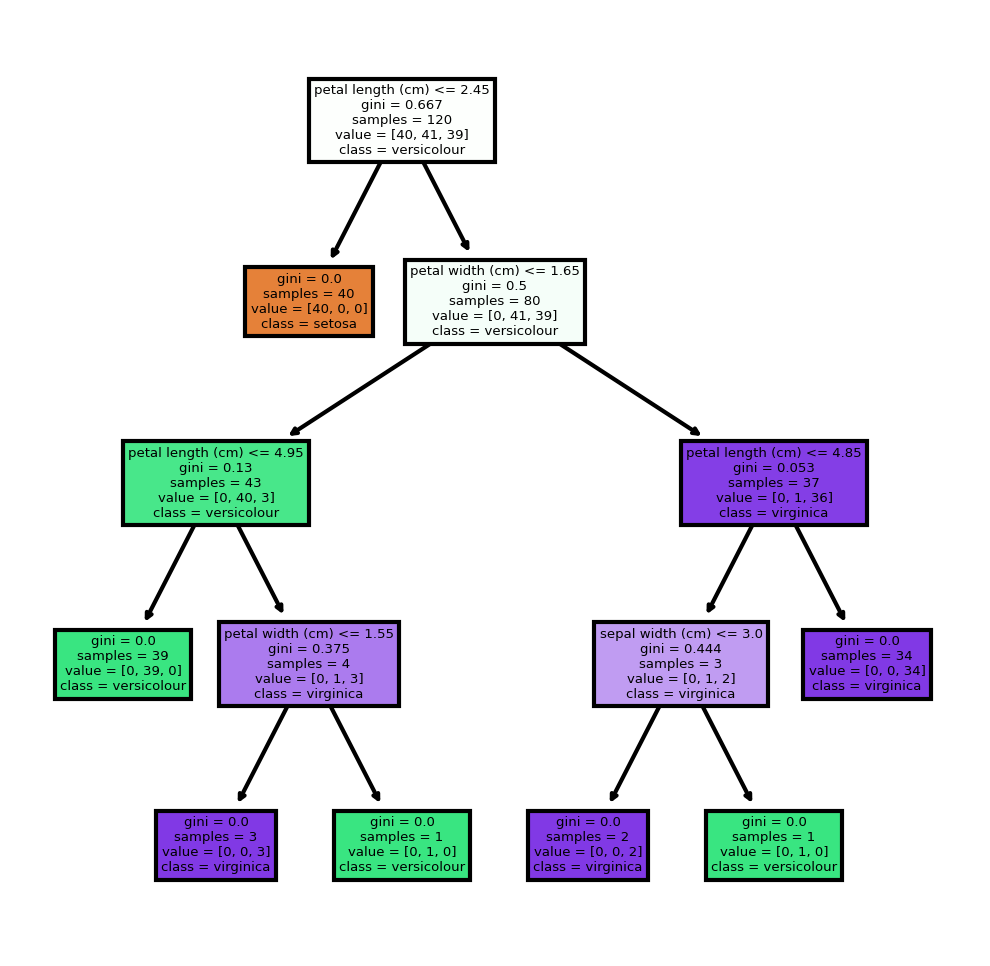

In [30]:
from sklearn import tree
names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes= ['setosa','versicolour','virginica']
fig,axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dtree, feature_names=names, class_names=classes,filled=True)

13. Applying Decision Tree Algorithm on whole dataset

In [31]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

14. Visualising the Decision Tree

[Text(464.99999999999994, 830.5, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(393.46153846153845, 679.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(536.5384615384615, 679.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolour'),
 Text(286.15384615384613, 528.5, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolour'),
 Text(143.07692307692307, 377.5, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolour'),
 Text(71.53846153846153, 226.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolour'),
 Text(214.61538461538458, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(429.23076923076917, 377.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(357.6923076923077, 226.5, 'gini = 0.0\nsample

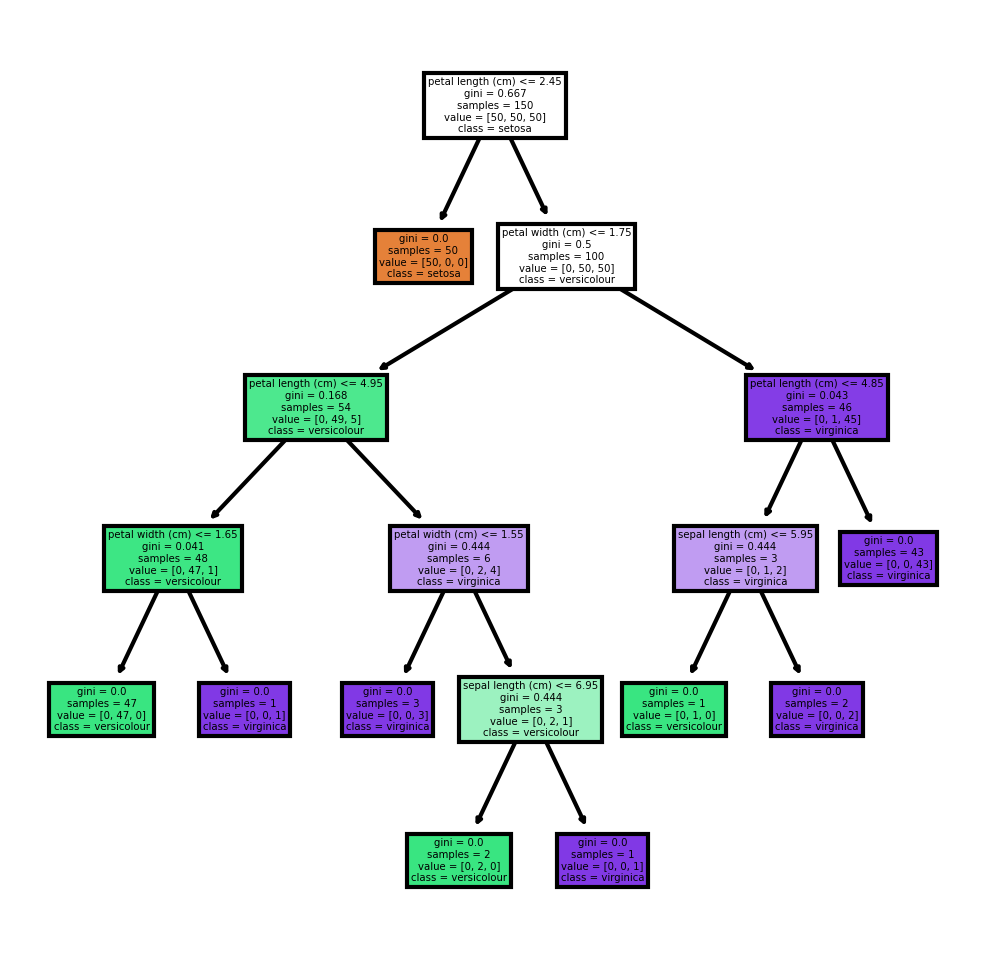

In [32]:
from sklearn import tree
names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classes= ['setosa','versicolour','virginica']
fig,axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dtree1, feature_names=names, class_names=classes,filled=True)

# **Thank You!**